# 5章 線形回帰

例5-1 scikit-learnを使って線形回帰を実行する例

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# データを読み込む
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
X = df.values[:, :-1]
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]
print(Y)

[ 5 10 10 15 14 15 19 18 25 23]


In [ ]:
# 点を直線に当てはめる
fit = LinearRegression().fit(X, Y)

# m = 1.7867224, b = -16.51923513
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))


m = [1.93939394]
b = [4.73333333]


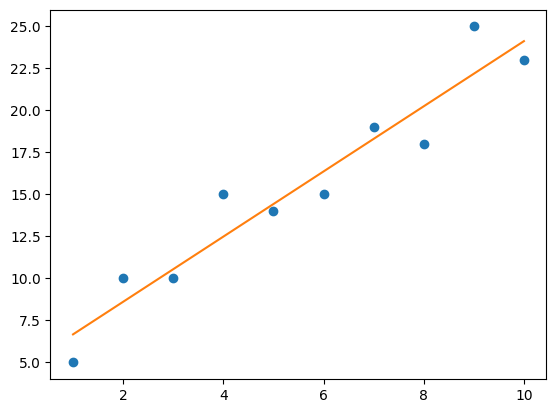

In [ ]:
# グラフを表示する
plt.plot(X, Y, 'o') # 点
plt.plot(X, m*X+b) # 直線
plt.show();

例5-2 直線とデータとの残差を求める例

In [ ]:
import pandas as pd

# 点を読み込む
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",").itertuples()
# 直線を与える
m = 1.93939
b = 4.73333

# 残差を求める
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)


-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


例5-4 直線とデータに対する二乗和を求める例

In [ ]:
import pandas as pd

# 点を読み込む
points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()

# 直線を与える
m = 1.93939
b = 4.73333

sum_of_squares = 0.0

# 二乗和を求める
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_predict - y_actual)**2
    sum_of_squares += residual_squared

print("sum of squares = {}".format(sum_of_squares))

sum of squares = 28.096969704500005


例5-5 単回帰におけるmとbを求める例

In [ ]:
import pandas as pd

# データを読み込む
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points) *
    sum(p.y for p in points)) / (n*sum(p.x**2 for p in points) -
    sum(p.x for p in points)**2)

b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)

1.9393939393939394 4.7333333333333325


例5-6 逆行列と転置行列を使って線形回帰を当てはめる例

In [ ]:
import pandas as pd
from numpy.linalg import inv
import numpy as np

# 点を読み込む
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
X = df.values[:, :-1].flatten()

# 「1」のプレースホルダー列を追加し、切片を生成する
X_1 = np.vstack([X, np.ones(len(X))]).T

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

# 傾きと切片の係数を求める
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(b)

[1.93939394 4.73333333]


例5-7 QR分解を使って線形回帰を実行する例

In [ ]:
import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

# 点を読み込む
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
X = df.values[:, :-1].flatten()

# 「1」のプレースホルダー列を追加し、切片を生成する
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

# QR分解を使って傾きと切片の係数を求める
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)

print(b)

[1.93939394 4.73333333]


例5-8 勾配降下法を使って放物線の最小値を見つける例

In [ ]:
import random

def f(x):
    return (x - 3) ** 2 + 4

def dx_f(x):
    return 2*(x - 3)

# 学習率
L = 0.001

# 勾配降下法を実行する反復回数
iterations = 100_000

 # ランダムなxの値を使って開始する
x = random.randint(-15,15)

for i in range(iterations):

    # 傾きを得る
    d_x = dx_f(x)

    # 学習率と傾きを掛けた値を引いてxの値を更新する
    x -= L * d_x

print(x, f(x))

2.999999999999889 4.0


例5-9 線形回帰における勾配降下法の実行例

In [ ]:
import pandas as pd

# CSVから点を読み込む
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

# モデルを構築する
m = 0.0
b = 0.0


# 学習率
L = 0.001

# 反復の回数
iterations = 100_000

n = float(len(points))  # Xの要素数

# 勾配降下法を実行する
for i in range(iterations):

    # mに対する傾き
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)

    # bに対する傾き
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)

    # mとbを更新する
    m -= L * D_m
    b -= L * D_b

print("y = {0}x + {1}".format(m, b))

y = 1.9393939393939548x + 4.733333333333227


例5-10 mとbの偏微分を求める例

In [ ]:
from sympy import *

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))
sum_of_squares

Sum((b + m*x(i) - y(i))**2, (i, 0, n))

In [ ]:
d_m = diff(sum_of_squares, m)
d_m

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))

In [ ]:
d_b = diff(sum_of_squares, b)
d_b

Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))

例5-11 SymPyを使って線形回帰を実行する例

In [ ]:
import pandas as pd
from sympy import *

# CSVから点を読み込む
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))
sum_of_squares

Sum((b + m*x(i) - y(i))**2, (i, 0, n))

In [ ]:
d_m = diff(sum_of_squares, m) \
    .subs(n, len(points) - 1).doit() \
    .replace(x, lambda i: points[i].x) \
    .replace(y, lambda i: points[i].y)
d_m

110*b + 770*m - 2014

In [ ]:
d_b = diff(sum_of_squares, b) \
    .subs(n, len(points) - 1).doit() \
    .replace(x, lambda i: points[i].x) \
    .replace(y, lambda i: points[i].y)
d_b

20*b + 110*m - 308

In [ ]:
# lambdifyを使ってラムダ関数に変換し高速に計算できるようにする
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

# モデルの構築
m = 0.0
b = 0.0

# 学習率
L = 0.001

# 反復の回数
iterations = 100_000

# 勾配降下法を実行する
for i in range(iterations):

    # mとbを更新する
    m -= d_m(m,b) * L
    b -= d_b(m,b) * L

print("y = {0}x + {1}".format(m, b))


y = 1.939393939393954x + 4.733333333333231


例5-12 線形回帰の損失関数を描画する例

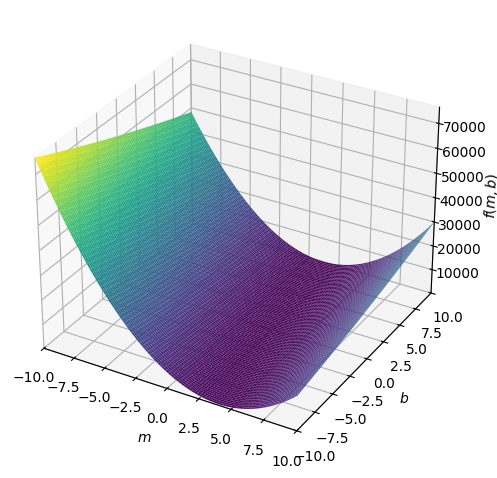

In [ ]:
from sympy import *
from sympy.plotting import plot3d
import pandas as pd

points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n)) \
    .subs(n, len(points) - 1).doit() \
    .replace(x, lambda i: points[i].x) \
    .replace(y, lambda i: points[i].y)

plot3d(sum_of_squares, (m, -10, 10), (b, -10, 10));

例5-13 線形回帰に確率的勾配降下法を使った例

In [ ]:
import pandas as pd
import numpy as np

# 入力データ
data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)

X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values

n = data.shape[0]  # 行数

# モデルを構築する
m = 0.0
b = 0.0

sample_size = 1  # 標本のサイズ
L = 0.0001  # 学習率
epochs = 1_000_000  # 勾配降下法を実行する反復の回数

# 確率的勾配降下法を実行する
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]

    # 現在のyの予測値
    Y_pred = m * x_sample + b

    # 損失関数をmで偏微分する
    D_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_pred))

    # 損失関数をbで偏微分する
    D_b = (-2 / sample_size) * sum(y_sample - Y_pred)
    m = m - L * D_m  # mを更新する
    b = b - L * D_b  # bを更新する

    # 進捗を表示する
    if i % 10000 == 0:
        print(i, m, b)

print("y = {0}x + {1}".format(m, b))

0 0.001 0.001
10000 2.339626102709293 1.85742269158737
20000 2.2089625880061874 2.84318732572853
30000 2.1069696643909577 3.488067107214731
40000 2.0511194120243315 3.9267037358166603
50000 1.9836185792944012 4.208628872378836
60000 2.002932403541999 4.401489802020749
70000 2.018855779970465 4.517137970305113
80000 1.9829782664477282 4.5951469506717
90000 1.9743054754993608 4.6311332348509096
100000 1.9469324525770473 4.650794428279595
110000 1.9294811799345999 4.6821429612184335
120000 1.9455955305595436 4.670199016856043
130000 1.9184103243523574 4.686208511865525
140000 1.9669941101901425 4.692545843714768
150000 1.9701479147496181 4.714744966259425
160000 1.9394165200310807 4.713257770343444
170000 1.9623868746657587 4.70943762170904
180000 1.9393374318825607 4.719616575363001
190000 1.9623351321503153 4.696962188889357
200000 1.9525790375354715 4.712091042352691
210000 1.9648312273191755 4.735642835757868
220000 1.9463590658679255 4.710886923206818
230000 1.9752622209149824 4.7054

例5-14 Pandasを使って変数の組み合わせに対する相関係数を確認する例

In [ ]:
import pandas as pd

# データをPandasのデータフレームとして読み込む
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

# 変数間の相関係数を出力する
correlations = df.corr(method='pearson')
correlations

,x,y
x,1.000000,0.957586
y,0.957586,1.000000


例5-15 Pythonでゼロから相関係数を求める例

In [ ]:
import pandas as pd
from math import sqrt

# CSVから点を読み込む
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
n = len(points)

numerator = n * sum(p.x * p.y for p in points) - \
            sum(p.x for p in points) * sum(p.y for p in points)

denominator = sqrt(n*sum(p.x**2 for p in points) - sum(p.x for p in points)**2) \
              * sqrt(n*sum(p.y**2 for p in points) - sum(p.y for p in points)**2)

corr = numerator / denominator
corr

0.9575860952087218

例5-16 t分布の臨界値を求める例

In [ ]:
from scipy.stats import t

n = 10
lower_cv = t(n-1).ppf(0.025)
upper_cv = t(n-1).ppf(0.975)

print(lower_cv, upper_cv)

-2.2621571628540997 2.2621571628540993


例5-17 線形に見えるデータの優位性を検定する例

In [ ]:
from scipy.stats import t
from math import sqrt

# 標本のサイズ
n = 10

lower_cv = t(n-1).ppf(0.025)
upper_cv = t(n-1).ppf(0.975)

# https://bit.ly/2KF29Bd のデータから求めた相関係数
r = 0.957586

# 検定を実行する
test_value = r / sqrt((1-r**2) / (n-2))

print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("CORRELATION PROVEN, REJECT H0")
else:
    print("CORRELATION NOT PROVEN, FAILED TO REJECT H0 ")

# p値を求める
if test_value > 0:
    p_value = 1.0 - t(n-1).cdf(test_value)
else:
    p_value = t(n-1).cdf(test_value)

# 両側検定のため、2を掛ける
p_value = p_value * 2
print("P-VALUE: {}".format(p_value))

TEST VALUE: 9.399564671312076
CRITICAL RANGE: -2.2621571628540997, 2.2621571628540993
CORRELATION PROVEN, REJECT H0
P-VALUE: 5.9763860877914965e-06


例5-18 Pandasで相関行列を生成する例

In [ ]:
import pandas as pd

# データをPandasのデータフレームとして読み込む
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

# 変数間の相関係数を求め、二乗して表示する
coeff_determination = df.corr(method='pearson') ** 2
coeff_determination

,x,y
x,1.000000,0.916971
y,0.916971,1.000000


例5-19 推定標準誤差を求める例

In [ ]:
import pandas as pd
from math import sqrt

# データを読み込む
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

# 回帰直線の値を定義する
m = 1.939
b = 4.733

# 推定標準誤差を求める
S_e = sqrt((sum((p.y - (m*p.x +b))**2 for p in points))/(n-2))

print(S_e)

1.87406793500129


例5-20 8.5歳の犬に対する動物病院への通院回数の予測区間を求める例

In [ ]:
import pandas as pd
from scipy.stats import t
from math import sqrt

# データを読み込む
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

# 線形回帰直線
m = 1.939
b = 4.733

# x = 8.5に対する予測区間を求める
x_0 = 8.5
x_mean = sum(p.x for p in points) / len(points)

t_value = t(n - 2).ppf(0.975)

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / (n - 2))

margin_of_error = t_value * standard_error * \
                  sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / \
                       (n * sum(p.x ** 2 for p in points) - \
                            sum(p.x for p in points) ** 2))

predicted_y = m*x_0 + b

# 予測区間の計算
print(predicted_y - margin_of_error, predicted_y + margin_of_error)

16.46251687560351 25.966483124396493


例5-21 線形回帰のデータを訓練用データとテスト用データに分割する例

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# データを読み込む
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
X = df.values[:, :-1]

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

# 訓練用とテスト用にデータを分割する
# これによりデータの1/3がテスト用になる
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("r^2: %.3f" % result)

r^2: 0.993


例5-22 線形回帰に対して三分割の交差検証を適用する例

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
X = df.values[:, :-1]

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

# 単純な線形回帰（単回帰）を実行する
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.99337354 0.99345032 0.99251425]
MSE: mean=0.993 (stdev-0.000)


例5-23 線形回帰にランダムフォールド検証を使う例

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

df = pd.read_csv('https://bit.ly/38XwbeB', delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
X = df.values[:, :-1]

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

# 単純な線形回帰（単回帰）を実行する
kfold = ShuffleSplit(n_splits=10, test_size=0.33, random_state=7)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(results)
print("mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.82514286 0.23552344 0.92653455 0.91620594 0.73260142 0.8698865
 0.55254014 0.89593526 0.91570078 0.82086621]
mean=0.769 (stdev-0.208)


例5-24 ふたつの入力変数がある線形回帰の例

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# データを読み込む
df = pd.read_csv('https://bit.ly/2X1HWH7', delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
X = df.values[:, :-1]

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

# 訓練する
fit = LinearRegression().fit(X, Y)

# 相関を表示する
print("Coefficients = {0}".format(fit.coef_))
print("Intercept = {0}".format(fit.intercept_))
print("z = {0} + {1}x + {2}y".format(fit.intercept_, fit.coef_[0], fit.coef_[1]))

Coefficients = [2.00672647 3.00203798]
Intercept = 20.109432820035963
z = 20.109432820035963 + 2.006726472512807x + 3.0020379766466925y
